In [1]:
import numpy as np
import matplotlib.pyplot as plt

# KNN Algorithm

In [2]:
# Uniform distribution을 이용해서 10 * 2 배열을 임의로 생성한다.
random_generator = np.random.RandomState(42)
dataset = random_generator.rand(10, 2)
dataset

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914]])

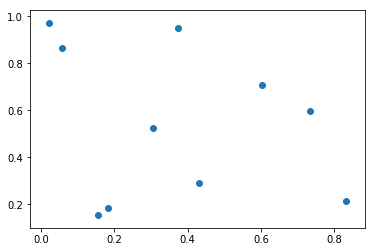

In [3]:
# Plot (아주 간단하게 plot)
x = dataset[:, 0]
y = dataset[:, 1]
plt.scatter(x, y)

### Vector간의 difference

* $v_1$에 대하여, $\text{dist}(v_1, v_2), \text{dist}(v_1, v_3), ..., \text{dist}(v_1, v_{10})$
* $v_2$에 대하여, $\text{dist}(v_2, v_1), \text{dist}(v_2, v_3), ..., \text{dist}(v_2, v_{10})$
* $v_{10}$에 대하여, $\text{dist}(v_{10}, v_1), \text{dist}(v_{10}, v_2), ..., \text{dist}(v_{10}, v_1)$

In [4]:
# dataset[: np.newaxis, :] 도 사용가능
row = dataset.reshape(10, 1, 2)
row

array([[[0.37454012, 0.95071431]],

       [[0.73199394, 0.59865848]],

       [[0.15601864, 0.15599452]],

       [[0.05808361, 0.86617615]],

       [[0.60111501, 0.70807258]],

       [[0.02058449, 0.96990985]],

       [[0.83244264, 0.21233911]],

       [[0.18182497, 0.18340451]],

       [[0.30424224, 0.52475643]],

       [[0.43194502, 0.29122914]]])

In [7]:
row.shape

(10, 1, 2)

In [5]:
# dataset[np.newaxis, :, :] 도 사용가능
other_rows = dataset.reshape(1, 10, 2)
other_rows

array([[[0.37454012, 0.95071431],
        [0.73199394, 0.59865848],
        [0.15601864, 0.15599452],
        [0.05808361, 0.86617615],
        [0.60111501, 0.70807258],
        [0.02058449, 0.96990985],
        [0.83244264, 0.21233911],
        [0.18182497, 0.18340451],
        [0.30424224, 0.52475643],
        [0.43194502, 0.29122914]]])

In [8]:
other_rows.shape

(1, 10, 2)

In [9]:
# r1, r2 ... 개별 거리 계산
differences = row - other_rows

differences

array([[[ 0.        ,  0.        ],
        [-0.35745382,  0.35205582],
        [ 0.21852148,  0.79471979],
        [ 0.31645651,  0.08453816],
        [-0.22657489,  0.24264173],
        [ 0.35395562, -0.01919555],
        [-0.45790252,  0.7383752 ],
        [ 0.19271515,  0.7673098 ],
        [ 0.07029788,  0.42595787],
        [-0.0574049 ,  0.65948517]],

       [[ 0.35745382, -0.35205582],
        [ 0.        ,  0.        ],
        [ 0.5759753 ,  0.44266396],
        [ 0.67391033, -0.26751766],
        [ 0.13087893, -0.10941409],
        [ 0.71140945, -0.37125137],
        [-0.1004487 ,  0.38631937],
        [ 0.55016897,  0.41525397],
        [ 0.4277517 ,  0.07390205],
        [ 0.30004892,  0.30742934]],

       [[-0.21852148, -0.79471979],
        [-0.5759753 , -0.44266396],
        [ 0.        ,  0.        ],
        [ 0.09793503, -0.71018163],
        [-0.44509637, -0.55207806],
        [ 0.13543415, -0.81391533],
        [-0.676424  , -0.05634459],
        [-0.02580633, -0

In [10]:
differences.shape

(10, 10, 2)

### Differences의 제곱

In [11]:
sq_differences = differences ** 2

### 제곱간의 합

In [12]:
sq_differences = sq_differences.sum(-1) #why -1?, sum의 index는 2라고 해주는 것,맨 끝의 인덱스

### Root

In [13]:
distances = np.sqrt(sq_differences)
distances

array([[0.        , 0.5017136 , 0.82421549, 0.32755369, 0.33198071,
        0.35447574, 0.86883407, 0.7911406 , 0.4317197 , 0.66197886],
       [0.5017136 , 0.        , 0.72642889, 0.72506609, 0.17058938,
        0.8024531 , 0.39916488, 0.68929077, 0.43408873, 0.4295837 ],
       [0.82421549, 0.72642889, 0.        , 0.71690251, 0.7091551 ,
        0.8251064 , 0.67876663, 0.0376467 , 0.39743626, 0.30728451],
       [0.32755369, 0.72506609, 0.71690251, 0.        , 0.56557921,
        0.11030352, 1.01347658, 0.69389411, 0.42090556, 0.68581077],
       [0.33198071, 0.17058938, 0.7091551 , 0.56557921, 0.        ,
        0.63684727, 0.5470504 , 0.67162543, 0.34891009, 0.44986324],
       [0.35447574, 0.8024531 , 0.8251064 , 0.11030352, 0.63684727,
        0.        , 1.11041752, 0.80286309, 0.52784779, 0.79361514],
       [0.86883407, 0.39916488, 0.67876663, 1.01347658, 0.5470504 ,
        1.11041752, 0.        , 0.65126075, 0.61367764, 0.40819356],
       [0.7911406 , 0.68929077, 0.0376467

In [14]:
nearest = np.argsort(distances, axis=1)
nearest

array([[0, 3, 4, 5, 8, 1, 9, 7, 2, 6],
       [1, 4, 6, 9, 8, 0, 7, 3, 2, 5],
       [2, 7, 9, 8, 6, 4, 3, 1, 0, 5],
       [3, 5, 0, 8, 4, 9, 7, 2, 1, 6],
       [4, 1, 0, 8, 9, 6, 3, 5, 7, 2],
       [5, 3, 0, 8, 4, 9, 1, 7, 2, 6],
       [6, 1, 9, 4, 8, 7, 2, 0, 3, 5],
       [7, 2, 9, 8, 6, 4, 1, 3, 0, 5],
       [8, 9, 4, 7, 2, 3, 0, 1, 5, 6],
       [9, 8, 7, 2, 6, 1, 4, 0, 3, 5]])

첫번째 결과인 [0, 3, 4, 5, 8, 1, 9, 7, 2, 6]을 해석해보면, 첫 번째로 작은 값을 가진 entry의 index는 0, 두 번째로 작은 값을 가진 entry의 index는 3, 그 다음으로는 index가 4 이다.  

0번 column은 row index에 해당하는 값이고(자기 자신과의 거리는 0이므로), 첫 번째 column이 가장 가까운 점이다.  

$k$ 번째라면 각 행을 partition으로 나눠 가장 작은 $k+1$개의 거리가 먼저 오고, 그 보다 큰 거리의 요소를 배열의 나머지 위치에 채우면 된다.

### $k$개 이웃 선정

In [15]:
# k = 2라고 하자.
k = 2
knn = nearest[:, 1:k+1]
knn

array([[3, 4],
       [4, 6],
       [7, 9],
       [5, 0],
       [1, 0],
       [3, 0],
       [1, 9],
       [2, 9],
       [9, 4],
       [8, 7]])

### Plot

* $v_1$과 가장 가까운 데이터는 $v_4$, $v_5$

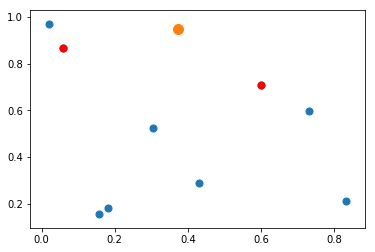

In [23]:
plt.scatter(x, y, s=50)
plt.scatter(dataset[0][0], dataset[0][1], s=99) # v1
nearest = dataset[knn[0]] # v4, v5
plt.scatter(nearest[:, 0], nearest[:, 1], c='r', s=50)

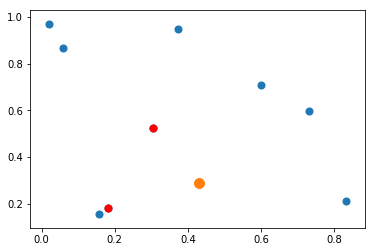

In [24]:
plt.scatter(x, y, s=50)
plt.scatter(dataset[9][0], dataset[9][1], s=99) # v9
nearest = dataset[knn[9]] # v8, v7
plt.scatter(nearest[:, 0], nearest[:, 1], c='r', s=50)

### 함수로 정의

In [25]:
def knn(dataset, k):
    dist = np.sqrt(np.sum((dataset[:, np.newaxis, :] - dataset[np.newaxis, :, :])** 2, axis=-1))
    near = np.argpartition(dist, k+1, axis=1)
    
    return near[:, :k+1]